In [6]:
import pylab as pl

import jax.numpy as np
from numpy.random import randn
import pytest
from numpy.testing import assert_allclose
from jax import random

from jaxrk.rkhs import CovOp, Cdo, Cmo, FiniteOp, FiniteVec, multiply, inner, SpVec, CombVec
from jaxrk.kern import (GaussianKernel, SplitDimsKernel, PeriodicKernel)
from jaxrk.utilities.array_manipulation import all_combinations
from sklearn.datasets import make_moons

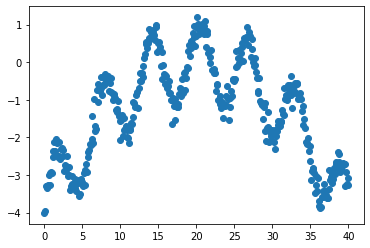

In [7]:
x = np.linspace(0, 40, 400).reshape((-1, 1))
y = np.sin(x) -(0.1*(x-20))**2 + randn(len(x)).reshape((-1, 1)) * 0.2
out_kern = GaussianKernel(0.5)
refervec = FiniteVec(out_kern, np.linspace(y[:-201].min() - 4, y[:-201].max() + 4, 6000)[:, None])

pl.scatter(x.T, y.T)

In [8]:
spv = SpVec(out_kern, np.hstack((x, y)), np.array([len(x)]), use_subtrajectories = True)

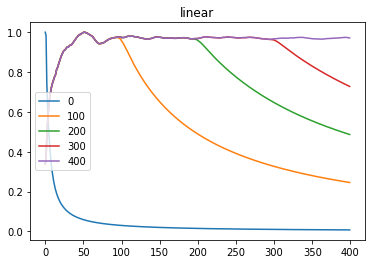

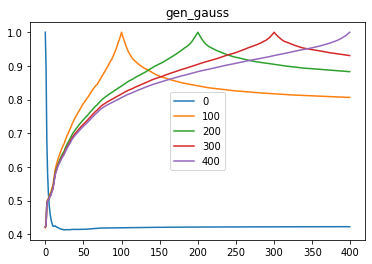

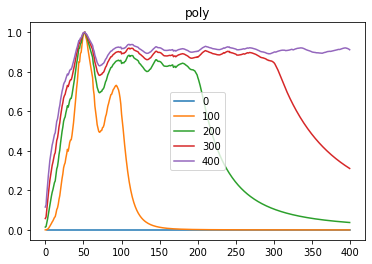

In [10]:
for dist in ("linear", "gen_gauss", "poly"):
    inn = spv.inner(dist = dist)
    pl.figure()
    for i in range(0, 401, 100):
        pl.plot(inn[i]/np.abs(inn[i]).max(), label=str(i))
    pl.legend(loc="best")
    pl.title(dist)